#### D1203_work_김현우
##### 【 ML - 꽃 품종 식별 모델 구현 】

- 주____제 : 3개 꽃 품종 식별 모델 구현으로 꽃가게 웹 서비스 
- 데이터셋
    * 파일명: Data/iris.csv
    * 피쳐들: 

        - 피쳐 1: 꽃받침(sepal) 길이/너비, 꽃잎(petal) 길이/너비
        - 피쳐 2: 꽃잎(petal) 길이/너비(시각화 결과 가장 명확하게 구분됨)
        - 피쳐 3: 꽃받침(sepal) 길이, 꽃잎(petal) 길이/너비(상관계수가 가장 높음!)

    * 타__겟: 품종

- 학습_종류: 분류
- 학습_방법: 지도학습

- 조____건  
    (1) 4개의 피쳐를 모두 사용한 모델  
    (2) 4개중 중요 피쳐만 사용한 모델

[1] 데이터 확인 : 피쳐와 타겟 <hr>

In [2]:
# [1-1] 모듈 로딩 및 데이터 준비
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 머신러닝 학습 알고리즘 모델
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# CoW 기능 활성화 : 데이터 변경시 복사 후 처리
if not pd.get_option('mode.copy_on_write'):  
    pd.options.mode.copy_on_write = True   
    print(f"CoW: {pd.get_option('mode.copy_on_write')}")  

CoW: True


In [4]:
# [1-2] 데이터 로딩 및 데이터 추출

FILE_NAME = '../Data/iris.csv'
dataDF = pd.read_csv(FILE_NAME)
display(dataDF.head())

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
# [1-3] 품종 컬럼 타입 변환 저장
varietyDF = dataDF.variety
# print(varietyDF)
dataDF.variety = dataDF.variety.astype('category')

In [6]:
# 전체 데이터 타입 확인
dataDF.info()   # 카테고리 타입으로 변환 확인

print(f"[categories] => {dataDF.variety.cat.categories}")
print(f"[categories] => \n{dataDF.variety.cat.codes}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal.length  150 non-null    float64 
 1   sepal.width   150 non-null    float64 
 2   petal.length  150 non-null    float64 
 3   petal.width   150 non-null    float64 
 4   variety       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB
[categories] => Index(['Setosa', 'Versicolor', 'Virginica'], dtype='object')
[categories] => 
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int8


[2] 피쳐/데이터와 타겟/라벨 분리 <hr>

In [7]:
# 학습용 피쳐/데이터와 타겟/라벨 분리
# 학습용 피쳐/데이터

# 피쳐 1: 꽃받침(sepal) 길이/너비, 꽃잎(petal) 길이/너비 =========================================================
featureDF1 = dataDF[dataDF.columns[:-1]]
# print(featureDF1)
# ===========================================================================================================

# 피쳐 2: 꽃잎(petal) 길이/너비(시각화 결과 가장 명확하게 구분됨) ==================================================
featureDF2 = dataDF[dataDF.columns[2:-1]]
# print(featureDF2)
# ===========================================================================================================

# 피쳐 3: 꽃받침(sepal) 길이, 꽃잎(petal) 길이/너비(상관계수가 가장 높음!) =========================================
featureDF3 = dataDF[['sepal.length', 'petal.length', 'petal.width']]
# print(featureDF3)
# ===========================================================================================================

# 타겟/라벨
targetDF = dataDF[dataDF.columns[-1]]
# print(targetDF)

print(f"featureDF : {featureDF1.shape} / {featureDF1.ndim}, targetDF : {targetDF.shape} / {targetDF.ndim}")

featureDF : (150, 4) / 2, targetDF : (150,) / 1


[3] 시각화 및 상관계수 비교<hr>

상관계수 : 
              sepal.length  sepal.width  petal.length  petal.width
sepal.length      1.000000    -0.117570      0.871754     0.817941
sepal.width      -0.117570     1.000000     -0.428440    -0.366126
petal.length      0.871754    -0.428440      1.000000     0.962865
petal.width       0.817941    -0.366126      0.962865     1.000000


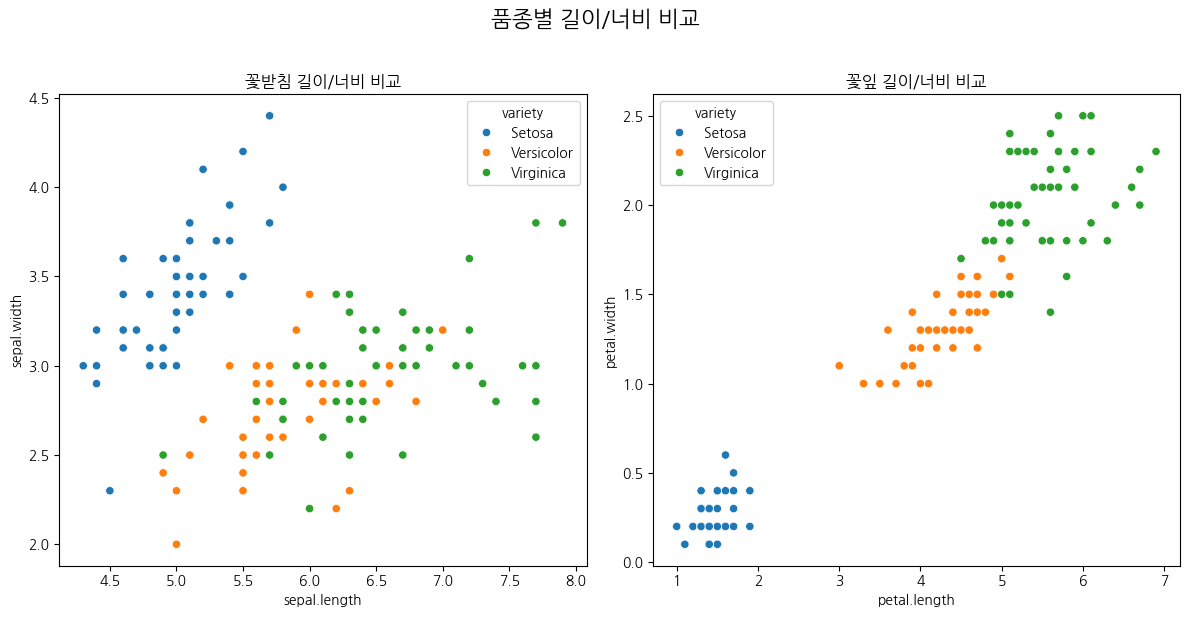

In [8]:
# ===================================================================
# 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Sepal =============================================================
sns.scatterplot(data=dataDF, x='sepal.length', y='sepal.width', 
                hue=dataDF.columns[-1], ax=ax1)
ax1.set_title('꽃받침 길이/너비 비교')

# Petal =============================================================
sns.scatterplot(data=dataDF, x='petal.length', y='petal.width', 
                hue=dataDF.columns[-1], ax=ax2)
ax2.set_title('꽃잎 길이/너비 비교')

plt.suptitle('품종별 길이/너비 비교', fontsize=16, y=1.02)
plt.tight_layout()
plt.show
# ===================================================================
# 상관계수
print(f"상관계수 : \n{featureDF1.corr()}")

인사이트: 시각화 결과 꽃잎(petal)의 길이/너비가 중요 피쳐임을 알게 됨! -> 품종별 명확한 구분 -> 학습률이 올라감

[4] 학습 진행 <hr>

In [9]:
# 모델 인스턴스 생성
# 피쳐 1: 꽃받침(sepal) 길이/너비, 꽃잎(petal) 길이/너비
kModel1 = KNeighborsClassifier()
kModel1

# 피쳐 2: 꽃잎(petal) 길이/너비(시각화 결과 가장 명확하게 구분됨)
kModel2 = KNeighborsClassifier()
kModel2

# 피쳐 3: 꽃받침(sepal) 길이, 꽃잎(petal) 길이/너비(상관계수가 가장 높음!)
kModel3 = KNeighborsClassifier()
kModel3

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [10]:
# 학습 진행 : 학습용데이터(2차원), 타겟(1차원)
kModel1.fit(featureDF1, targetDF)
kModel2.fit(featureDF2, targetDF)
kModel3.fit(featureDF3, targetDF)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


[5] 평가진행 : 테스트용 데이터/피쳐와 타겟 <hr>
- 학습용 데이터 평가결과와 테스트용 데이터 평과결과 비교

In [ ]:
print(f"피쳐1 평가: {kModel1.score(featureDF1, targetDF)}")
print(f"피쳐2 평가: {kModel2.score(featureDF2, targetDF)}")
print(f"피쳐3 평가: {kModel3.score(featureDF3, targetDF)}")

print("====================================")
print("Best 모델은 피쳐3을 활용한 모델!")
print("====================================")


피쳐1 평가: 0.9666666666666667
피쳐2 평가: 0.96
피쳐3 평가: 0.9733333333333334
Best 모델은 피쳐3을 활용한 모델!


[6] 모델 활용 서비스 <hr>

In [ ]:
in_data = input("꽃의 꽃받침(sepal) 길이, 꽃잎(petal) 길이/너비를 입력하시오(예: (5.1 1.4 0.2)): ").strip().split()

in_data = list(map(float, in_data))

new_data = pd.DataFrame([in_data], columns=featureDF3.columns)

print(kModel3.predict(new_data))